In [5]:
import csv
import os
from google.colab import drive

# Read the CSV file from Google Drive
file_path = "/content/drive/MyDrive/Dataset/train.csv"
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    titanic_train_data = list(reader)

file_path = "/content/drive/MyDrive/Dataset/test.csv"
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    titanic_test_data = list(reader)    

In [7]:

# Import necessary libraries
import pandas as pd

# Read the CSV files into dataframes
titanic_train_data = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")
titanic_test_data = pd.read_csv("/content/drive/MyDrive/Dataset/test.csv")

train_df = titanic_train_data
test_df = titanic_test_data


In [8]:
# Display the first few rows of the training data
print(train_df.head())

# Get information about the dataset, such as column data types and missing values
print(train_df.info())

# Generate summary statistics for the numerical columns
print(train_df.describe())

# Count the number of unique values in the 'Survived' column
print(train_df['Survived'].value_counts())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
# Fill missing values in the 'Age' column with the mean age
mean_age = train_df['Age'].mean()
train_df['Age'].fillna(mean_age, inplace=True)

# Drop the 'Cabin' column since it has many missing values
train_df.drop('Cabin', axis=1, inplace=True)

# Drop rows with missing values in the 'Embarked' column
train_df.dropna(subset=['Embarked'], inplace=True)

# Convert the 'Sex' column to a numerical value (0 for male, 1 for female)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Convert the 'Embarked' column to numerical values (0 for C, 1 for Q, 2 for S)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [10]:
# Create a new 'FamilySize' feature by adding the 'SibSp' and 'Parch' columns
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

# Drop the 'SibSp' and 'Parch' columns as they are now redundant
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)


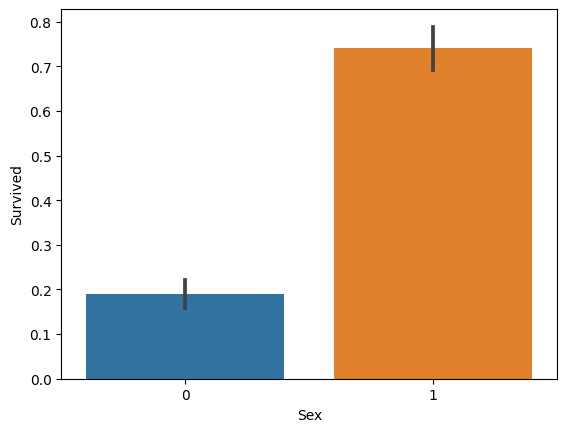

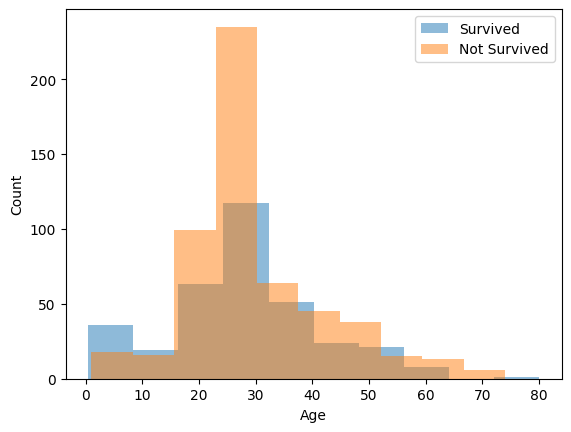

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.show()

# Create a histogram of age distribution for survivors and non-survivors
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

plt.hist(survived['Age'], alpha=0.5, label='Survived')
plt.hist(not_survived['Age'], alpha=0.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Select relevant features for the model
X = train_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = train_df['Survived']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random


SyntaxError: ignored

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Select relevant features for the model
X = train_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = train_df['Survived']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [15]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7827715355805244


In [16]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy}")


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best hyperparameters: {'C': 1}
Optimized Accuracy: 0.7827715355805244


<ipython-input-17-11502a5b991c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_df.corr()


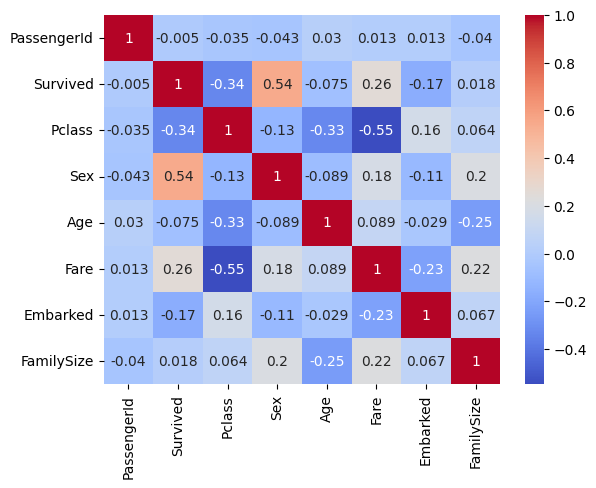

In [17]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations between features
correlations = train_df.corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()


In [18]:
# Define a function to extract titles from names
def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    else:
        return 'Other'

# Apply the function to the 'Name' column and create a new 'Title' column
train_df['Title'] = train_df['Name'].apply(extract_title)



In [19]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7752808988764045


In [20]:
# Import necessary libraries
from sklearn.feature_selection import RFE

# Instantiate the RFE selector with the logistic regression estimator
rfe_selector = RFE(LogisticRegression(), n_features_to_select=4)

# Fit the selector on the training data
rfe_selector.fit(X_train, y_train)

# Print the ranking of features
print(f"Feature ranking: {rfe_selector.ranking_}")

# Train the model with the selected features
X_train_selected = rfe_selector.transform(X_train)
X_test_selected = rfe_selector.transform(X_test)

# Train the model on the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")


Feature ranking: [1 1 2 3 1 1]
Accuracy with selected features: 0.7902621722846442


In [21]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Scale the features before using SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train the model on the oversampled training data
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the testing data
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with SMOTE: {accuracy}")


Accuracy with SMOTE: 0.797752808988764
